In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [7]:
dataset=load_iris()

X=pd.DataFrame(dataset.data, columns=['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width'])
y=pd.DataFrame(dataset.target, columns=['Targets'])

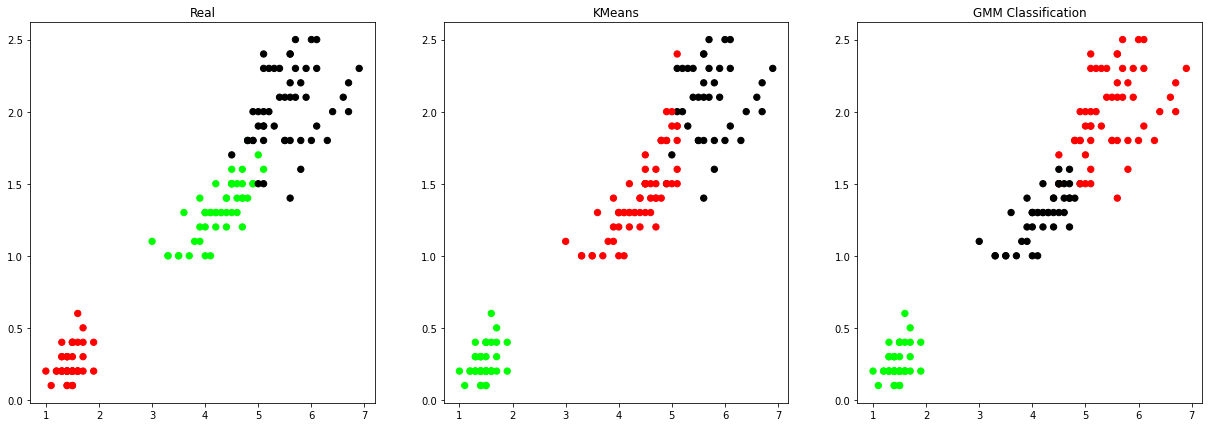

In [30]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture

plt.figure(figsize=(21,7)) # w, h
colormap=np.array(['red','lime','black'])

# REAL PLOT
plt.subplot(1,3,1)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y.Targets],s=40)
plt.title('Real')

# K-PLOT
model=KMeans(3)
model.fit(X)
y_pred=np.choose(model.labels_,[0,1,2]).astype(np.int64)

plt.subplot(1,3,2)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y_pred],s=40)
plt.title('KMeans')

# GMM PLOT
scaler=preprocessing.StandardScaler()
xsa=scaler.fit_transform(X)
xs=pd.DataFrame(xsa,columns=X.columns)

gmm=GaussianMixture(3)
gmm.fit(xs)
y_cluster=gmm.predict(xs)

plt.subplot(1,3,3)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y_cluster],s=40)
plt.title('GMM Classification')

plt.show()